In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import os
import json5
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:

data_dir = './dump_data'
all_files = os.listdir(data_dir)
print(f"All files: {all_files}")


# Verify the content and structure of the files
data_entries = []
file_count = 0

for file_name in all_files:
    if file_name.startswith('sdgIndicatorData__') and file_name.endswith('.json5'):
        file_path = os.path.join(data_dir, file_name)
        file_count += 1
        with open(file_path, 'r') as f:
            try:
                data = json5.load(f)
                print(f"Loaded data from {file_name}: {data.keys()}")  # Print the keys to verify structure
                if 'data' in data:
                    data_entries.extend(data['data'])
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

print(f"Total files processed: {file_count}")
print(f"Total data entries loaded: {len(data_entries)}")
if len(data_entries) > 0:
    print(json5.dumps(data_entries[0], indent=2))
else:
    print("No data entries loaded.")


All files: ['indicatorDataMeta.json5', 'sdgIndicatorData__1.1.1.json5', 'sdgIndicatorData__1.2.1.json5', 'sdgIndicatorData__1.2.2.json5']
Loaded data from sdgIndicatorData__1.1.1.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorData__1.2.1.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorData__1.2.2.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Total files processed: 3
Total data entries loaded: 9
{
  goal: [
    "1",
  ],
  target: [
    "1.1",
  ],
  indicator: [
    "1.1.1",
  ],
  series: "SI_POV_DAY1",
  seriesDescription: "Proportion of population below international poverty line (%)",
  seriesCount: "8748",
  geoAreaCode: "32",
  geoAreaName: "Argentina",
  timePeriodStart: 2020,
  value: "1.6",
  valueType: "Float",
  time_detail: null,
  timeCoverage: null,
  upperBound: null,
  lowerBound: null,
  basePeriod: null,
  source:

In [3]:

# Convert data to DataFrame
df = pd.DataFrame(data_entries)


# Flatten nested columns
df['goal'] = df['goal'].apply(lambda x: x[0])
df['target'] = df['target'].apply(lambda x: x[0])
df['indicator'] = df['indicator'].apply(lambda x: x[0])
df['key'] = df['key'].apply(lambda x: x[0])
df['footnotes'] = df['footnotes'].apply(lambda x: x[0] if x else None)


In [4]:
df

,goal,target,indicator,series,seriesDescription,seriesCount,geoAreaCode,geoAreaName,timePeriodStart,value,...,timeCoverage,upperBound,lowerBound,basePeriod,source,geoInfoUrl,footnotes,attributes,dimensions,key
0,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,8748,32,Argentina,2020,1.6,...,None,None,None,None,"Poverty and Inequality Portal, World Bank",None,"Accessed April 8, 2022. Based on data from EPH...","{'Nature': 'G', 'Units': 'PERCENT'}","{'Age': 'ALLAGE', 'Location': 'ALLAREA', 'Sex'...",1.1.1
1,1,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,32396,50,Bangladesh,2020,5.1,...,None,None,None,None,"Source = ILO modelled estimates, November 2021...",None,,"{'Nature': 'M', 'Units': 'PERCENT', 'Observati...","{'Age': '15+', 'Sex': 'BOTHSEX', 'Reporting Ty...",1.1.1
2,1,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,32396,716,Zimbabwe,2020,39.5,...,None,None,None,None,"Source = ILO modelled estimates, November 2021...",None,,"{'Nature': 'M', 'Units': 'PERCENT', 'Observati...","{'Age': '15+', 'Sex': 'BOTHSEX', 'Reporting Ty...",1.1.1
3,1,1.2,1.2.1,SI_POV_NAHC,Proportion of population living below the nati...,912,4,Afghanistan,2007,33.7,...,None,None,None,None,"Poverty and Inequality Platform, World Bank",None,Source: National Statistics and Information Au...,"{'Nature': 'CA', 'Units': 'PERCENT'}","{'Location': 'ALLAREA', 'Reporting Type': 'G'}",1.2.1
4,1,1.2,1.2.1,SI_POV_NAHC,Proportion of population living below the nati...,912,450,Madagascar,2001,70.8,...,None,None,None,None,"Poverty and Inequality Platform, World Bank",None,"Source: Madagascar Poverty, Gender and Inequal...","{'Nature': 'CA', 'Units': 'PERCENT'}","{'Location': 'ALLAREA', 'Reporting Type': 'G'}",1.2.1
5,1,1.2,1.2.1,SI_POV_NAHC,Proportion of population living below the nati...,912,716,Zimbabwe,2019,38.3,...,None,None,None,None,"Poverty and Inequality Platform, World Bank",None,Source: Mini-PICES 2019 (April/ May 2019). Pov...,"{'Nature': 'CA', 'Units': 'PERCENT'}","{'Location': 'ALLAREA', 'Reporting Type': 'G'}",1.2.1
6,1,1.2,1.2.2,SD_MDP_MUHC,Proportion of population living in multidimens...,2380,4,Afghanistan,2016,61.1,...,None,None,None,None,National Statistics and Information Authority ...,None,Data source: Â Afghanistan Living Conditions S...,"{'Nature': 'C', 'Units': 'PERCENT'}","{'Age': 'ALLAGE', 'Location': 'RURAL', 'Sex': ...",1.2.2
7,1,1.2,1.2.2,SD_MDP_MUHC,Proportion of population living in multidimens...,2380,428,Latvia,2016,35.0,...,None,None,None,None,EUROSTAT,None,Data source: EUROPEAN UNION STATISTICS ON INCO...,"{'Nature': 'C', 'Units': 'PERCENT'}","{'Age': 'ALLAGE', 'Location': 'RURAL', 'Sex': ...",1.2.2
8,1,1.2,1.2.2,SD_MDP_ANDIHH,Average share of weighted deprivations of tota...,48,275,State of Palestine,2016,41.7,...,None,None,None,None,The Palestinian Central Bureau of Statistics (...,None,Data source: Palestinian Consumptionand Expend...,"{'Nature': 'C', 'Units': 'PERCENT'}","{'Location': 'ALLAREA', 'Reporting Type': 'G'}",1.2.2


In [5]:

# Flatten nested columns
df['goal'] = df['goal'].apply(lambda x: x[0])
df['target'] = df['target'].apply(lambda x: x[0])
df['indicator'] = df['indicator'].apply(lambda x: x[0])
df['key'] = df['key'].apply(lambda x: x[0])
df['footnotes'] = df['footnotes'].apply(lambda x: x[0] if x else None)


In [6]:
df

,goal,target,indicator,series,seriesDescription,seriesCount,geoAreaCode,geoAreaName,timePeriodStart,value,...,timeCoverage,upperBound,lowerBound,basePeriod,source,geoInfoUrl,footnotes,attributes,dimensions,key
0,1,1,1,SI_POV_DAY1,Proportion of population below international p...,8748,32,Argentina,2020,1.6,...,None,None,None,None,"Poverty and Inequality Portal, World Bank",None,A,"{'Nature': 'G', 'Units': 'PERCENT'}","{'Age': 'ALLAGE', 'Location': 'ALLAREA', 'Sex'...",1
1,1,1,1,SI_POV_EMP1,Employed population below international povert...,32396,50,Bangladesh,2020,5.1,...,None,None,None,None,"Source = ILO modelled estimates, November 2021...",None,None,"{'Nature': 'M', 'Units': 'PERCENT', 'Observati...","{'Age': '15+', 'Sex': 'BOTHSEX', 'Reporting Ty...",1
2,1,1,1,SI_POV_EMP1,Employed population below international povert...,32396,716,Zimbabwe,2020,39.5,...,None,None,None,None,"Source = ILO modelled estimates, November 2021...",None,None,"{'Nature': 'M', 'Units': 'PERCENT', 'Observati...","{'Age': '15+', 'Sex': 'BOTHSEX', 'Reporting Ty...",1
3,1,1,1,SI_POV_NAHC,Proportion of population living below the nati...,912,4,Afghanistan,2007,33.7,...,None,None,None,None,"Poverty and Inequality Platform, World Bank",None,S,"{'Nature': 'CA', 'Units': 'PERCENT'}","{'Location': 'ALLAREA', 'Reporting Type': 'G'}",1
4,1,1,1,SI_POV_NAHC,Proportion of population living below the nati...,912,450,Madagascar,2001,70.8,...,None,None,None,None,"Poverty and Inequality Platform, World Bank",None,S,"{'Nature': 'CA', 'Units': 'PERCENT'}","{'Location': 'ALLAREA', 'Reporting Type': 'G'}",1
5,1,1,1,SI_POV_NAHC,Proportion of population living below the nati...,912,716,Zimbabwe,2019,38.3,...,None,None,None,None,"Poverty and Inequality Platform, World Bank",None,S,"{'Nature': 'CA', 'Units': 'PERCENT'}","{'Location': 'ALLAREA', 'Reporting Type': 'G'}",1
6,1,1,1,SD_MDP_MUHC,Proportion of population living in multidimens...,2380,4,Afghanistan,2016,61.1,...,None,None,None,None,National Statistics and Information Authority ...,None,D,"{'Nature': 'C', 'Units': 'PERCENT'}","{'Age': 'ALLAGE', 'Location': 'RURAL', 'Sex': ...",1
7,1,1,1,SD_MDP_MUHC,Proportion of population living in multidimens...,2380,428,Latvia,2016,35.0,...,None,None,None,None,EUROSTAT,None,D,"{'Nature': 'C', 'Units': 'PERCENT'}","{'Age': 'ALLAGE', 'Location': 'RURAL', 'Sex': ...",1
8,1,1,1,SD_MDP_ANDIHH,Average share of weighted deprivations of tota...,48,275,State of Palestine,2016,41.7,...,None,None,None,None,The Palestinian Central Bureau of Statistics (...,None,D,"{'Nature': 'C', 'Units': 'PERCENT'}","{'Location': 'ALLAREA', 'Reporting Type': 'G'}",1


In [7]:
# Select relevant columns for model
features = ['goal', 'target', 'indicator', 'series', 'geoAreaCode', 'geoAreaName', 'timePeriodStart', 'attributes', 'dimensions']
df_features = df[features].copy()

In [8]:

# Convert nested dictionaries to separate columns
df_features = pd.concat([df_features.drop(['attributes', 'dimensions'], axis=1), df_features['attributes'].apply(pd.Series), df_features['dimensions'].apply(pd.Series)], axis=1)

# Handle missing values (if any)
df_features.fillna(value={'time_detail': '', 'timeCoverage': '', 'upperBound': 0, 'lowerBound': 0, 'basePeriod': 0, 'geoInfoUrl': '', 'footnotes': ''}, inplace=True)

# Handle categorical variables
categorical_columns = ['goal', 'target', 'indicator', 'series', 'geoAreaName', 'Nature', 'Units', 'Age', 'Location', 'Sex', 'Reporting Type']
numerical_columns = ['geoAreaCode', 'timePeriodStart']

# Define target variable
target = df['value'].astype(float)


In [9]:

# Create preprocessing pipelines
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])


In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size=0.2, random_state=42)

# Create and train the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['geoAreaCode',
                                                   'timePeriodStart']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['goal', 'target',
                                                   'indicator', 'series',
                                                   'geoAreaName', 'Nature',
                                                   'Units', 'Age', 'Location',
                                                   'Sex',
                                                   'Reporting Type'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [11]:

# Predict and evaluate the model
y_pred = model.predict(X_test)
print(y_pred) 

# evaluate model by calculating mse
mse = mean_squared_error(y_test, y_pred)
print(f'\n\nMean Squared Error: {mse}')


[48.768 36.794]


Mean Squared Error: 597.0337299999991


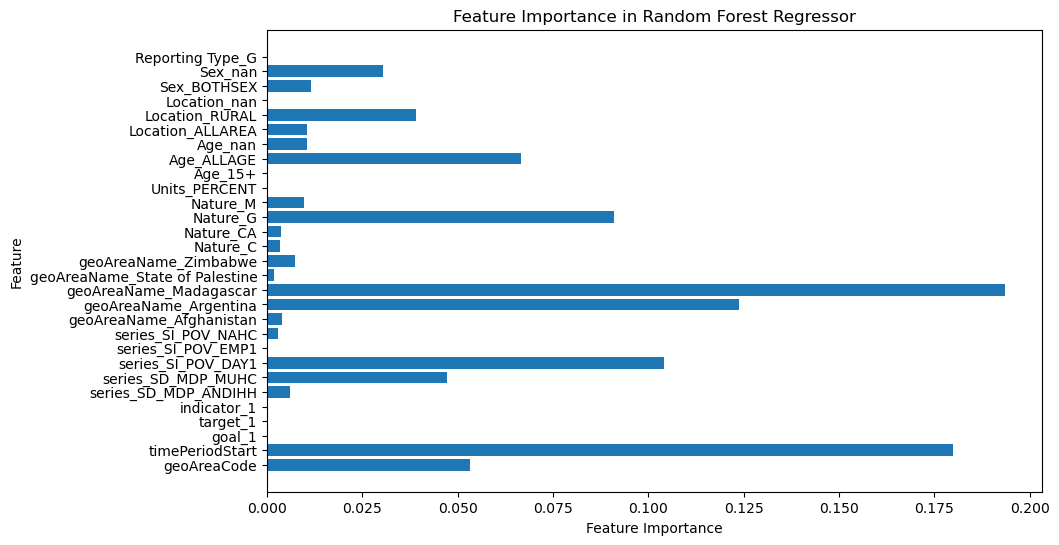

In [12]:
# Visualize feature importance
import matplotlib.pyplot as plt

feature_names = model.named_steps['preprocessor'].transformers_[0][1]['scaler'].get_feature_names_out(numerical_columns).tolist() + model.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_columns).tolist()
feature_importances = model.named_steps['regressor'].feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Regressor')
plt.show()



 Predictions on test data:  [60.92994724 37.74637327]
Gradient Boosting Regressor Mean Squared Error: 869.0739257800167


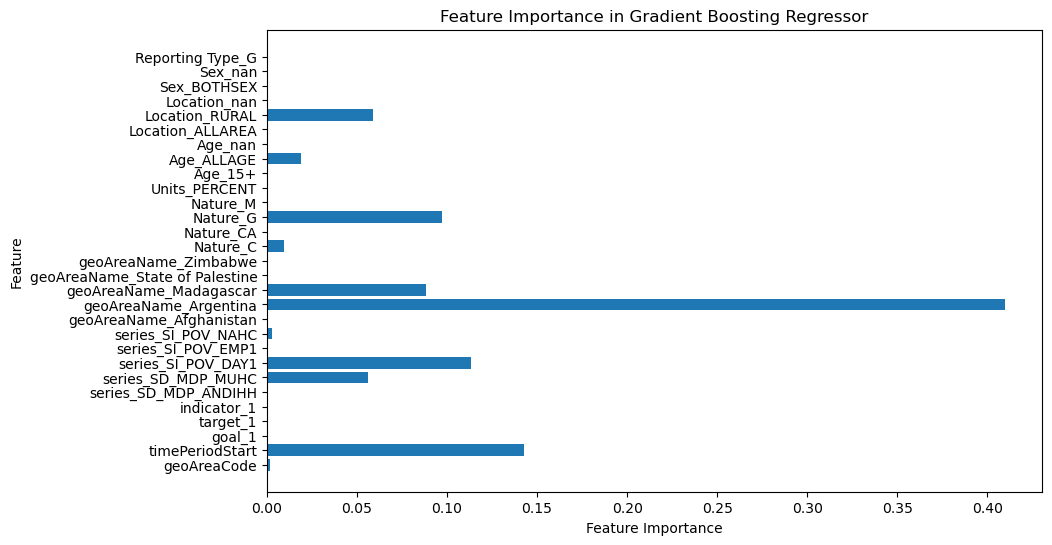

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

# Select relevant columns for model
features = ['goal', 'target', 'indicator', 'series', 'geoAreaCode', 'geoAreaName', 'timePeriodStart', 'attributes', 'dimensions']
df_features = df[features].copy()

# Convert nested dictionaries to separate columns
df_features = pd.concat([df_features.drop(['attributes', 'dimensions'], axis=1), df_features['attributes'].apply(pd.Series), df_features['dimensions'].apply(pd.Series)], axis=1)

# Handle missing values (if any)
df_features.fillna(value={'time_detail': '', 'timeCoverage': '', 'upperBound': 0, 'lowerBound': 0, 'basePeriod': 0, 'geoInfoUrl': '', 'footnotes': ''}, inplace=True)

# Handle categorical variables
categorical_columns = ['goal', 'target', 'indicator', 'series', 'geoAreaName', 'Nature', 'Units', 'Age', 'Location', 'Sex', 'Reporting Type']
numerical_columns = ['geoAreaCode', 'timePeriodStart']

# Define target variable
target = df['value'].astype(float)

# Create preprocessing pipelines
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting Regressor model
model_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

model_gb.fit(X_train, y_train)

# Predict and evaluate the Gradient Boosting Regressor model
y_pred_gb = model_gb.predict(X_test)

print("\n\n Predictions on test data: ", y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Gradient Boosting Regressor Mean Squared Error: {mse_gb}')

# Visualize feature importance for Gradient Boosting Regressor
import matplotlib.pyplot as plt

feature_names_gb = model_gb.named_steps['preprocessor'].transformers_[0][1]['scaler'].get_feature_names_out(numerical_columns).tolist() + model_gb.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_columns).tolist()
feature_importances_gb = model_gb.named_steps['regressor'].feature_importances_

# Plot feature importances for Gradient Boosting Regressor
plt.figure(figsize=(10, 6))
plt.barh(feature_names_gb, feature_importances_gb)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Gradient Boosting Regressor')
plt.show()